/home/fedya/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fedya/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fedya/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/fedya/anaconda3/envs/test/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.92018779342723   0.9741784037558685   0.9953051643192489
0.9090909090909091   0.9440559440559441   0.972027972027972


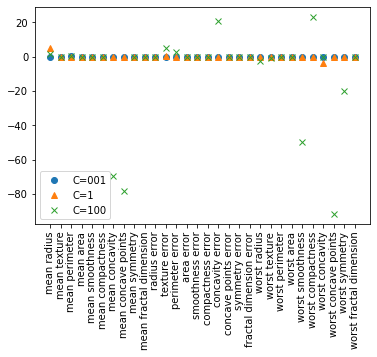

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

%matplotlib inline

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=66
)

def kNeighbors():
    training_accuracy = []
    test_accuracy = []

    neighbors_settings = range(1, 11)

    for n_neighbors in neighbors_settings:
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)
        clf.fit(X_train, y_train)
        training_accuracy.append(clf.score(X_train, y_train))
        test_accuracy.append(clf.score(X_test, y_test))

    plt.plot(neighbors_settings, training_accuracy, label='training dataset accuracy')
    plt.plot(neighbors_settings, test_accuracy, label='test dataset accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('neighbors count')
    plt.legend()

def logReg():
    logreg1 = LogisticRegression(C=1, penalty='l1').fit(X_train, y_train)
    logreg001 = LogisticRegression(C=0.01, penalty='l1').fit(X_train, y_train)
    logreg100 = LogisticRegression(C=100, penalty='l1').fit(X_train, y_train)
    
    print(logreg001.score(X_train, y_train), ' ', logreg1.score(X_train, y_train), ' ', logreg100.score(X_train, y_train))
    print(logreg001.score(X_test, y_test), ' ', logreg1.score(X_test, y_test), ' ', logreg100.score(X_test, y_test))
    
    plt.plot(logreg001.coef_.T, 'o', label="C=001")
    plt.plot(logreg1.coef_.T, '^', label="C=1")
    plt.plot(logreg100.coef_.T, 'x', label="C=100")
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
#     plt.hlines(0, 0, cancer.data.shape[1])
#     plt.ylim(-5, 5)
    plt.legend()
    
    
    
    
# kNeighbors()
logReg()